### 语言模型

In [3]:
database  = 'F:\\NLP-dataset\\sqlResult_1558435.csv'

In [4]:
import os

In [5]:
os.path.exists(database)

True

In [7]:
import pandas as pd

In [8]:
df = pd.read_csv(database, encoding='gb18030')

In [13]:
df['content'].tolist()[:2]

['此外，自本周（6月12日）起，除小米手机6等15款机型外，其余机型已暂停更新发布（含开发版/体验版内测，稳定版暂不受影响），以确保工程师可以集中全部精力进行系统优化工作。有人猜测这也是将精力主要用到MIUI 9的研发之中。\r\nMIUI 8去年5月发布，距今已有一年有余，也是时候更新换代了。\r\n当然，关于MIUI 9的确切信息，我们还是等待官方消息。\r\n',
 '骁龙835作为唯一通过Windows 10桌面平台认证的ARM处理器，高通强调，不会因为只考虑性能而去屏蔽掉小核心。相反，他们正联手微软，找到一种适合桌面平台的、兼顾性能和功耗的完美方案。\r\n报道称，微软已经拿到了一些新的源码，以便Windows 10更好地理解big.little架构。\r\n资料显示，骁龙835作为一款集成了CPU、GPU、基带、蓝牙/Wi-Fi的SoC，比传统的Wintel方案可以节省至少30%的PCB空间。\r\n按计划，今年Q4，华硕、惠普、联想将首发骁龙835 Win10电脑，预计均是二合一形态的产品。\r\n当然，高通骁龙只是个开始，未来也许还能见到三星Exynos、联发科、华为麒麟、小米澎湃等进入Windows 10桌面平台。\r\n']

In [14]:
import re

In [15]:
def token(content):
    return " ".join(re.findall('[\w|\d]+',content))

In [19]:
case = "@@@&&&& This is a case\u3000 to figure out 正则表达式"
token(case)

'This is a case to figure out 正则表达式'

In [34]:
all_articles = [token(str(a)) for a in all_articles]

In [35]:
all_articles[:2]

['此外 自本周 6月12日 起 除小米手机6等15款机型外 其余机型已暂停更新发布 含开发版 体验版内测 稳定版暂不受影响 以确保工程师可以集中全部精力进行系统优化工作 有人猜测这也是将精力主要用到MIUI 9的研发之中 MIUI 8去年5月发布 距今已有一年有余 也是时候更新换代了 当然 关于MIUI 9的确切信息 我们还是等待官方消息',
 '骁龙835作为唯一通过Windows 10桌面平台认证的ARM处理器 高通强调 不会因为只考虑性能而去屏蔽掉小核心 相反 他们正联手微软 找到一种适合桌面平台的 兼顾性能和功耗的完美方案 报道称 微软已经拿到了一些新的源码 以便Windows 10更好地理解big little架构 资料显示 骁龙835作为一款集成了CPU GPU 基带 蓝牙 Wi Fi的SoC 比传统的Wintel方案可以节省至少30 的PCB空间 按计划 今年Q4 华硕 惠普 联想将首发骁龙835 Win10电脑 预计均是二合一形态的产品 当然 高通骁龙只是个开始 未来也许还能见到三星Exynos 联发科 华为麒麟 小米澎湃等进入Windows 10桌面平台']

In [36]:
text = ''
for i in all_articles:
    text += i
print('length:{}'.format(len(text)))

length:37412506


In [37]:
from functools import reduce

In [39]:
from_reduce = reduce(lambda a1,a2: a1+a2, all_articles[:2])

In [40]:
import jieba

In [44]:
def cut(string): return list(jieba.cut(string))

In [46]:
print(len(cut(text)))

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\cassi\AppData\Local\Temp\jieba.cache
Loading model cost 0.601 seconds.
Prefix dict has been built succesfully.


21906852


In [47]:
all_tokens = cut(text)

In [63]:
valid_token = [t for t in all_tokens if t.strip()]

In [64]:
print(len(valid_token))

17830864


### 获得词频

In [50]:
from collections import Counter

In [65]:
words_count = Counter(valid_token) # 获得每个词的出现次数

In [66]:
words_count.most_common(10)

[('的', 703820),
 ('n', 609079),
 ('在', 264633),
 ('月', 189525),
 ('日', 169920),
 ('新华社', 142462),
 ('和', 134220),
 ('年', 123531),
 ('了', 121904),
 ('是', 100288)]

In [68]:
frequences = [f for w,f in words_count.most_common(100)]

In [69]:
print(frequences)

[703820, 609079, 264633, 189525, 169920, 142462, 134220, 123531, 121904, 100288, 88187, 84945, 83263, 78950, 77935, 71180, 70521, 64720, 62276, 62082, 61657, 60640, 58383, 58317, 58103, 52271, 50582, 48836, 47399, 46556, 40857, 40081, 38168, 37648, 37118, 36906, 36059, 35921, 35082, 34659, 33954, 33893, 32235, 30575, 30575, 30451, 29693, 28679, 28420, 28042, 27189, 26691, 26575, 26456, 26386, 26155, 25986, 25510, 25391, 25288, 25252, 24945, 23925, 23362, 23334, 23044, 22761, 22556, 22208, 22175, 21937, 21920, 21786, 21713, 21589, 21406, 21076, 21046, 21004, 20722, 20701, 20327, 19987, 19982, 19209, 19029, 18995, 18905, 18882, 18757, 18678, 18416, 18167, 18152, 18128, 17644, 17404, 17350, 17310, 17309]


In [70]:
x = [i for i in range(len(frequences[:100]))] # 统计前100个词频的变化曲线图

In [71]:
%matplotlib inline

In [73]:
import matplotlib.pyplot as plt

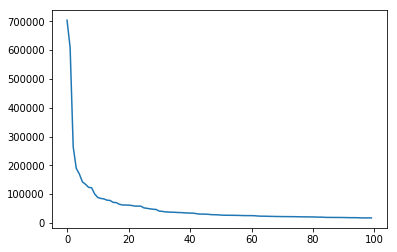

In [74]:
plt.plot(x, frequences)

In [75]:
import numpy as np

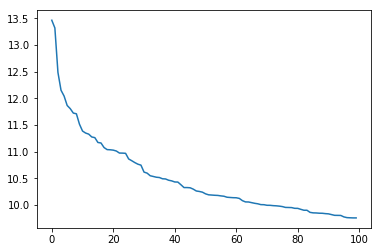

In [76]:
plt.plot(x, np.log(frequences)) # 用log可以平缓

### 1-gram

In [78]:
len(valid_token)

17830864

In [79]:
frequences_sum = [f for w,f in words_count.most_common()]

In [83]:
frequences_sum = sum(frequences_sum)

In [81]:
esp = 1/sum(frequences_sum)

In [82]:
esp

5.6082531951340104e-08

In [84]:
def get_prob(word): # 获得单个词的概率
    if word in words_count:
        return words_count[word] / frequences_sum
    else:
        return esp

In [85]:
get_prob('好像')

1.3459807668321625e-05

In [86]:
def get_product(words_prob):
    return reduce(lambda x1, x2: x1*x2, words_prob)

In [89]:
def language_model_one_gram(content):
    words = cut(content)
    return get_product([get_prob(i) for i in words])

In [90]:
language_model_one_gram('明天会下雨')

9.135165177262909e-14

In [91]:
language_model_one_gram('明天晴天')

2.8231767501296e-11

In [99]:
sentence = """
太阳从西边升起
太阳从东边升起
兔子会飞
鸟会飞
"""

In [100]:
for s in sentence.split():
    print(s,  language_model_one_gram(s))

太阳从西边升起 2.8182096362742606e-19
太阳从东边升起 3.330611388324126e-19
兔子会飞 1.245519154468941e-12
鸟会飞 3.311948660746957e-12


In [101]:
need_compared = [
    "今晚去吃火锅 去吃火锅今晚",
    "小猫躺在床上 小猫躺在怀里",
    "太阳从西边升起 太阳从东边升起",
    "兔子会飞 鸟会飞"
]
for s in need_compared:
    s1,s2 = s.split()
    p1,p2 = language_model_one_gram(s1), language_model_one_gram(s2)
    better = s1 if p1>p2 else s2
    print('{} is better'.format(better))
    print('\t{} with probility {}'.format(s1,p1))
    print('\t{} with probility {}'.format(s2,p2))

今晚去吃火锅 is better
	今晚去吃火锅 with probility 8.462444417088839e-16
	去吃火锅今晚 with probility 8.4624444170888385e-16
小猫躺在床上 is better
	小猫躺在床上 with probility 2.889542597771319e-18
	小猫躺在怀里 with probility 1.7887644652870068e-18
太阳从东边升起 is better
	太阳从西边升起 with probility 2.8182096362742606e-19
	太阳从东边升起 with probility 3.330611388324126e-19
鸟会飞 is better
	兔子会飞 with probility 1.245519154468941e-12
	鸟会飞 with probility 3.311948660746957e-12


### 2-gram

In [104]:
all_2_gram_word = [''.join(valid_token[i:i+2]) for i in range(len(valid_token[:-2]))]

In [106]:
_2_gram_word = len(all_2_gram_word)

In [107]:
_2_gram_countr = Counter(all_2_gram_word)

In [110]:
def get_combination_prob(w1,w2):
    if w1+w2 in _2_gram_countr: return _2_gram_countr[w1+w2] / _2_gram_word
    else: return 1/_2_gram_word

In [116]:
get_combination_prob('测试','开发')

5.608253824184159e-08

In [115]:
get_combination_prob('苹果','手机')

2.5237142208828713e-06

In [117]:
def get_prob_2_gram(w1,w2):
    return get_combination_prob(w1,w2)/get_prob(w1)

In [127]:
get_prob_2_gram('波音','飞机')

0.03571428972018131

In [123]:
get_prob_2_gram('会','下雪')

5.7773419155645994e-05

In [126]:
get_prob_2_gram('去','北京')

0.0042518177859165234

In [128]:
def get_language_model_2_gram(sentence): 
    words = cut(sentence)
    sentence_prob = 1
    for i, word in enumerate(words):
        if i == 0:
            prob = get_prob(word)
        else:
            pre = words[i-1]
            prob = get_prob_2_gram(pre, word)
        sentence_prob *= prob
    return sentence_prob

In [129]:
get_language_model_2_gram("明天是世界末日")

4.473719251144208e-12

In [130]:
get_language_model_2_gram("明天不是世界末日")

2.3849689360979708e-11

In [132]:
need_compared = [
    "今晚去吃火锅 去吃火锅今晚",
    "小猫躺在床上 小猫躺在怀里",
    "太阳从西边升起 太阳从东边升起",
    "兔子会飞 鸟会飞",
    "明天放假 明天不放假"
]
for s in need_compared:
    s1,s2 = s.split()
    p1,p2 = get_language_model_2_gram(s1), get_language_model_2_gram(s2)
    better = s1 if p1>p2 else s2
    print('{} is better'.format(better))
    print('\t{} with probility {}'.format(s1,p1))
    print('\t{} with probility {}'.format(s2,p2))

去吃火锅今晚 is better
	今晚去吃火锅 with probility 7.69202366374212e-12
	去吃火锅今晚 with probility 8.011792076049114e-09
小猫躺在床上 is better
	小猫躺在床上 with probility 4.909129694239965e-12
	小猫躺在怀里 with probility 9.043133647284147e-13
太阳从西边升起 is better
	太阳从西边升起 with probility 1.717042303292992e-13
	太阳从东边升起 with probility 1.452881948940224e-13
鸟会飞 is better
	兔子会飞 with probility 5.6082538241841596e-08
	鸟会飞 with probility 5.6082538241841596e-08
明天放假 is better
	明天放假 with probility 5.608253824184159e-08
	明天不放假 with probility 9.866739009912698e-12


In [133]:
grammar = """
sentence => noun_phrase verb_phrase 
noun_phrase => Article Adj* noun belong 
belong => de property
de => 的
property => 眼睛 | 裙子 | 胳膊 | 尾巴
Adj* => null | Adj Adj*
verb_phrase => verb noun_phrase
Article =>  一个 | 这个
noun =>   女人 |  篮球 | 桌子 | 小猫
verb => 看着   |  坐在 |  听着 | 看见
Adj =>   蓝色的 |  好看的 | 小小的
"""

In [134]:
import random

In [135]:
def parse_grammar(grammar_str, sep='=>'):
    grammar = {}
    for line in grammar_str.split('\n'):
        line = line.strip()
        if not line: continue
        target,rules = line.split(sep)
        grammar[target.strip()] = [r.split() for r in rules.split('|')] 
    return grammar

In [138]:
parsed = parse_grammar(grammar)

In [142]:
def gene(grammar_parsed, target='sentence'):
    if target not in grammar_parsed: return target
    rule = random.choice(grammar_parsed[target])
    return ''.join(gene(grammar_parsed, target=r) for r in rule if r!= 'null')

In [144]:
random_generated = [gene(parsed) for _ in range(100)]

In [145]:
sorted(random_generated, key=get_language_model_2_gram,reverse = True)

['一个女人的尾巴看着这个小猫的眼睛',
 '这个桌子的尾巴看着这个桌子的眼睛',
 '这个桌子的胳膊看见这个小猫的眼睛',
 '一个女人的裙子坐在这个桌子的胳膊',
 '一个小猫的尾巴看着这个篮球的眼睛',
 '这个小猫的裙子坐在这个女人的胳膊',
 '一个女人的尾巴看着一个桌子的裙子',
 '一个小小的小猫的胳膊看着这个篮球的眼睛',
 '一个小猫的眼睛看见一个小猫的胳膊',
 '这个桌子的眼睛坐在这个篮球的眼睛',
 '一个女人的胳膊听着一个小猫的裙子',
 '这个篮球的眼睛看着这个篮球的胳膊',
 '一个小猫的裙子看见一个小猫的裙子',
 '一个小猫的眼睛坐在一个桌子的裙子',
 '这个桌子的尾巴看着一个桌子的胳膊',
 '一个女人的胳膊听着一个小小的小猫的胳膊',
 '这个女人的尾巴坐在这个篮球的裙子',
 '这个篮球的眼睛看见一个桌子的尾巴',
 '一个桌子的尾巴听着这个女人的尾巴',
 '这个小猫的胳膊听着一个篮球的眼睛',
 '一个小猫的眼睛听着这个女人的尾巴',
 '这个篮球的胳膊看着一个桌子的尾巴',
 '这个女人的眼睛听着一个篮球的裙子',
 '一个篮球的胳膊看见这个小小的小猫的裙子',
 '一个小小的女人的尾巴听着一个小猫的胳膊',
 '一个小猫的眼睛听着一个桌子的尾巴',
 '这个篮球的胳膊坐在这个篮球的尾巴',
 '一个小猫的眼睛听着这个桌子的裙子',
 '这个女人的尾巴听着一个小小的篮球的裙子',
 '一个小小的桌子的胳膊听着一个小猫的尾巴',
 '一个篮球的裙子看着一个小小的篮球的胳膊',
 '一个篮球的胳膊坐在这个小小的小猫的尾巴',
 '一个女人的胳膊坐在这个好看的女人的胳膊',
 '一个篮球的裙子听着这个篮球的裙子',
 '这个小小的小小的篮球的裙子看见一个小猫的眼睛',
 '这个桌子的尾巴听着一个小小的篮球的裙子',
 '一个蓝色的女人的裙子听着这个女人的眼睛',
 '一个小小的女人的胳膊看着这个蓝色的女人的尾巴',
 '一个桌子的眼睛看见这个蓝色的桌子的眼睛',
 '一个桌子的尾巴看见这个蓝色的桌子的胳膊',
 '一个桌子的眼睛看见一个蓝色的小猫的胳膊',
 '这个篮球的裙子坐在这个好看的女人的胳膊',
 '一个蓝色的女人的胳膊听着这个女人的尾巴',
 '这个蓝色的篮球的眼睛看着一个桌子的眼睛',
 '这个小猫的裙子坐在一个